Dataset can be found [here](https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland/kernels)

Inspiration from this [notebook](https://www.kaggle.com/alvaroibrain/australia-on-fire-animation/notebook)

My Mapbox Token [here](https://account.mapbox.com/access-tokens/ck9u201sr0pk93dpcj9pcghe1)

List of Plotly Mapbox Stlye [here](https://plotly.com/python/mapbox-layers/)

**Quick Summary from Documentation**
- "white-bg" yields an empty white canvas which results in no external HTTP requests
- "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor" yeild maps composed of raster tiles from various public tile servers which do not require signups or access tokens
- "basic", "streets", "outdoors", "light", "dark", "satellite", or "satellite-streets" yeild maps composed of vector tiles from the Mapbox service, and do require a Mapbox Access Token or an on-premise Mapbox installation.

This is a simple space visualization to show the impact of the Australian wildfire and how it has been spread across the country without successful containment. 

Original dataset is @ 103mb, however we only need the 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Define your Mapbox Token and Mapbox Style
MAPBOX_TOKEN = "pk.eyJ1IjoiYmFuaWxhNDgiLCJhIjoiY2s5dTIwMXNyMHBrOTNkcGNqOXBjZ2hlMSJ9.reOrj-S_7tiSlQ1Wd_2mKw"

# MAPBOX_STYLE = "pk.eyJ1IjoiYmFuaWxhNDgiLCJhIjoiY2s5dTF5ZG05MWpyMDNlcWNuZ3MxamgxYyJ9.jws92DLCQtNciy-6nE_ohw"

In [2]:
df = pd.read_csv("fire_archive_M6_96619.csv")
df.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          48      6.3       297.3   6.6        D     0  
1     Terra      MODIS          71      6.3       297.3  11.3        D     0  
2     Terra      MODIS          42      6.3       298.7  23.1        D     0  
3     Terra      MODIS          33      6.3       296.1   6.5        D     0  
4     Terra      MODIS          36      6.3       298.8  27.6        D     0

In [3]:
# Create a new column 'acq_datestring'

def to_hour_str(number):
    string = '{:04d}'.format(number)
    string = string[:2] + ":" + string[2:]
    return string

df['acq_datstring'] = df.apply(lambda x: x['acq_date'] + " " + to_hour_str(x['acq_time']), axis=1)

# df.head(10)
df.tail(10)

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
36001  -29.1196   122.9981       306.7   1.6    1.2  2019-09-30      1644   
36002  -29.1225   123.0141       300.6   1.6    1.2  2019-09-30      1644   
36003  -28.0557   131.6349       305.2   1.2    1.1  2019-09-30      1644   
36004  -28.0572   131.6473       302.1   1.2    1.1  2019-09-30      1644   
36005  -28.0640   131.6209       323.5   1.2    1.1  2019-09-30      1644   
36006  -28.0656   131.6334       312.7   1.2    1.1  2019-09-30      1644   
36007  -28.2625   128.5494       304.9   1.0    1.0  2019-09-30      1644   
36008  -28.2941   128.5123       301.7   1.0    1.0  2019-09-30      1644   
36009  -28.3001   128.5530       303.6   1.0    1.0  2019-09-30      1644   
36010  -30.8641   121.4995       309.1   1.8    1.3  2019-09-30      1645   

      satellite instrument  confidence  version  bright_t31   frp daynight  \
36001      Aqua      MODIS          69      6.3       287.9  17.8        N   
36002      Aqua      MODIS          31      6.3       289.0  10.6        N   
36003      Aqua      MODIS          63      6.3       292.3   7.9        N   
36004      Aqua      MODIS          41      6.3       291.7   5.7        N   
36005      Aqua      MODIS         100      6.3       293.9  27.4        N   
36006      Aqua      MODIS          85      6.3       292.9  14.2        N   
36007      Aqua      MODIS          27      6.3       290.9   6.4        N   
36008      Aqua      MODIS          43      6.3       290.4   5.5        N   
36009      Aqua      MODIS          41      6.3       290.3   5.7        N   
36010      Aqua      MODIS          77      6.3       290.9  23.0        N   

       type     acq_datstring  
36001     0  2019-09-30 16:44  
36002     0  2019-09-30 16:44  
36003     0  2019-09-30 16:44  
36004     0  2019-09-30 16:44  
36005     0  2019-09-30 16:44  
36006     0  2019-09-30 16:44  
36007     0  2019-09-30 16:44  
36008     0  2019-09-30 16:44  
36009     0  2019-09-30 16:44  
36010     2  2019-09-30 16:45

In [5]:
# Count the number of fires on the same date
## First group the 'acq_date' columns
## Count the number of dates
## Read more about using index [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html)

#
times = df.groupby(['acq_date'])['acq_date'].count().index.tolist()

## Using list comprehension to create a new column
frames_data = [df.loc[df['acq_date'] == t] for t in times]



In [6]:
frames = [go.Frame(data=[go.Densitymapbox(lat = f['latitude'], lon = f['longitude'], z=f['brightness'], radius = 10)], name=str(f.iloc[0]['acq_date'])) for f in frames_data]

In [7]:
buttons=[
         dict(label="Play",method="animate",
              args=[None, {'fromcurrent':True, "transition": {"duration": 30, "easing": "quadratic-in-out"}}]),
         dict(label="Pause",method="animate",
              args=[[None], {"frame": {"duration": 0, "redraw": False},"mode": "immediate", "transition": {"duration": 0}}])
]


sliders_dict = {
    'active':0,
    'currentvalue': dict(font=dict(size=16), prefix='Time: ', visible=True),
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    'x': 0,
    'steps': []
}

for i,t in enumerate(times):
    slider_step = {"args": [
                        [t],
                        {"frame": {"duration": 300, "redraw": False},
                         #"mode": "immediate",
                         "transition": {"duration": 30, "easing": "quadratic-in-out"}}
                    ],
            "label": t,
            "method": "animate",
            "value": t
    }
    sliders_dict['steps'].append(slider_step)

In [8]:
fig = go.Figure(data = [go.Densitymapbox(lat = df['latitude'], lon = df['longitude'], z = df['brightness'], radius = 1, 
colorscale = 'Hot', zmax = 400, zmin =0)],
               layout = go.Layout(updatemenus=[dict(type = "buttons", buttons = buttons,showactive = True)]), 
               frames = frames)

fig.update_layout(mapbox_style="dark",
                  mapbox_accesstoken = MAPBOX_TOKEN,
                  mapbox_center_lon = 135,
                  mapbox_center_lat = -25.35,
                  mapbox_zoom = 3.5)

fig.update_layout(sliders = [sliders_dict], title = "Australia Fires Over Time")

fig.update_layout(height=850)
fig.show()




Output
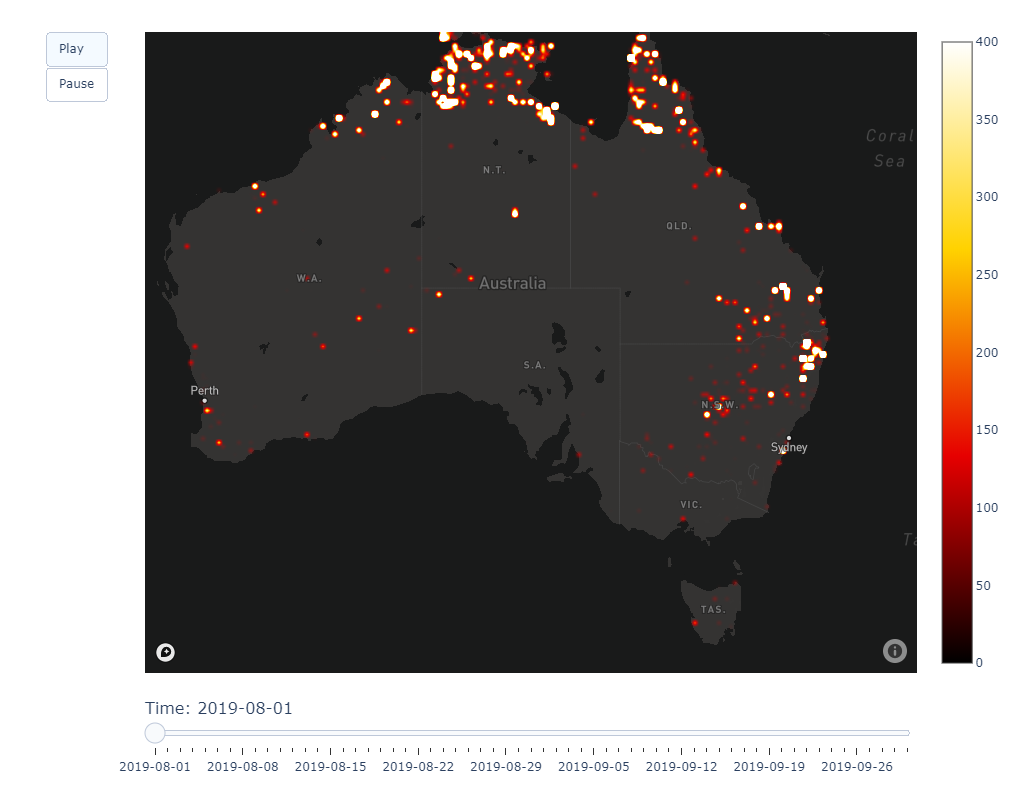
